In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies
from sklearn.preprocessing import StandardScaler
from scipy.stats import iqr
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
data = pd.read_csv("walmart.csv")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [45]:
data.shape

(550068, 10)

In [46]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [48]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [49]:
data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [50]:
data.duplicated().sum()

np.int64(0)

In [51]:
print(data.nunique())

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64


In [52]:
for col in data.columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())

Unique values in User_ID:
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
Unique values in Product_ID:
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Unique values in Gender:
['F' 'M']
Unique values in Age:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Unique values in Occupation:
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Unique values in City_Category:
['A' 'C' 'B']
Unique values in Stay_In_Current_City_Years:
['2' '4+' '3' '1' '0']
Unique values in Marital_Status:
[0 1]
Unique values in Product_Category:
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Unique values in Purchase:
[ 8370 15200  1422 ...   135   123   613]


In [53]:
print(data.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')


In [54]:
data = data.drop(columns=["Product_ID", "User_ID"])

In [55]:
age_mapping = {"0-17":0, "18-25":1,"26-35":2,"36-45":3,"46-50":4, "51-55":5, "55+":6}
data["Age"]=data["Age"].map(age_mapping)
print(data["Age"])


0         0
1         0
2         0
3         0
4         6
         ..
550063    5
550064    2
550065    2
550066    6
550067    4
Name: Age, Length: 550068, dtype: int64


In [56]:
Le = LabelEncoder()
data['Gender'] = Le.fit_transform(data['Gender'])
print(data['Gender'])

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int64


In [57]:
Le = LabelEncoder()
data["City_Category"] = Le.fit_transform(data["City_Category"])
print(data["City_Category"])

0         0
1         0
2         0
3         0
4         2
         ..
550063    1
550064    2
550065    1
550066    2
550067    1
Name: City_Category, Length: 550068, dtype: int64


In [58]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].replace('4+',4).astype(int)
print(data['Stay_In_Current_City_Years'])

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: int64


In [59]:
data.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,0,0,10,0,2,0,3,8370
1,0,0,10,0,2,0,1,15200
2,0,0,10,0,2,0,12,1422
3,0,0,10,0,2,0,12,1057
4,1,6,16,2,4,0,8,7969


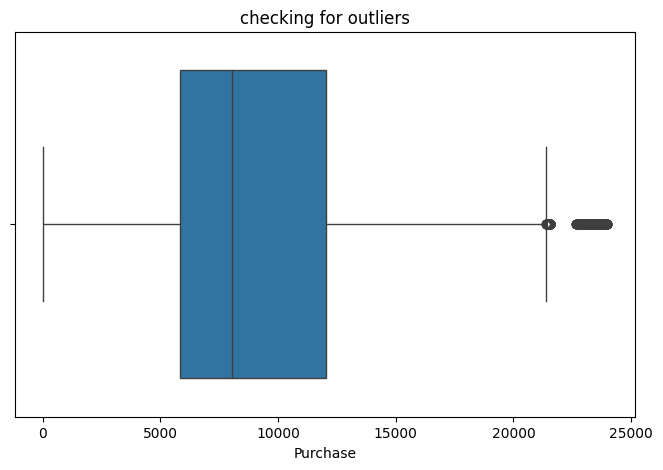

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data["Purchase"])
plt.title("checking for outliers")
plt.show()

In [61]:
q1 = data['Purchase'].quantile(0.25)
q3 = data['Purchase'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 + 1.5 * iqr
data = data[(data['Purchase'] >= lw) & (data['Purchase'] <= uw)]
print(data['Purchase'])

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 547391, dtype: int64


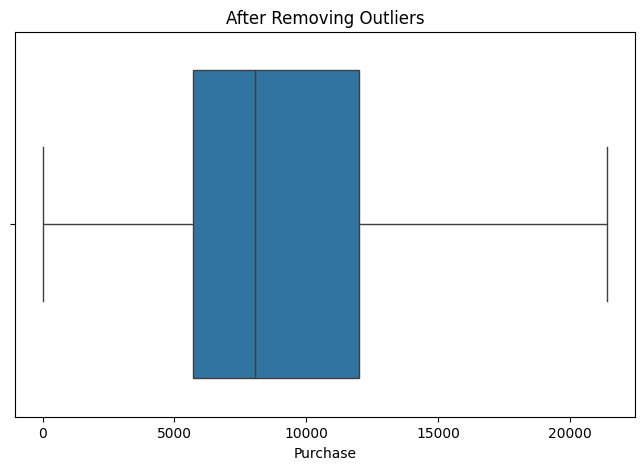

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data["Purchase"])
plt.title("After Removing Outliers")
plt.show()

In [63]:
data.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,0,0,10,0,2,0,3,8370
1,0,0,10,0,2,0,1,15200
2,0,0,10,0,2,0,12,1422
3,0,0,10,0,2,0,12,1057
4,1,6,16,2,4,0,8,7969


In [64]:
data.dtypes

,0
Gender,int64
Age,int64
Occupation,int64
City_Category,int64
Stay_In_Current_City_Years,int64
Marital_Status,int64
Product_Category,int64
Purchase,int64


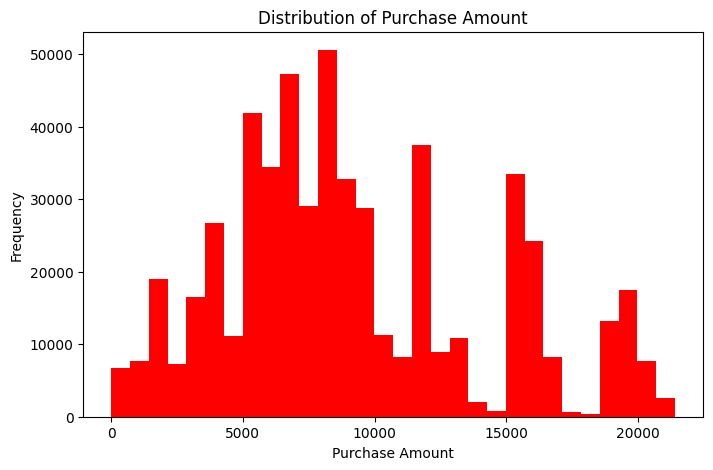

In [65]:
plt.figure(figsize=(8, 5))
plt.hist(data["Purchase"], bins=30, color='red')
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Purchase Amount")
plt.show()

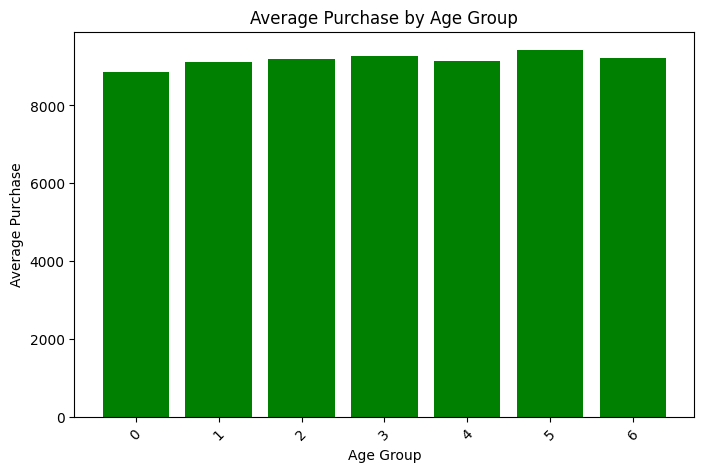

In [66]:
avg_purchase = data.groupby("Age")["Purchase"].mean()
plt.figure(figsize=(8, 5))
plt.bar(avg_purchase.index,avg_purchase.values, color='green')
plt.xlabel("Age Group")
plt.ylabel("Average Purchase")
plt.title("Average Purchase by Age Group")
plt.xticks(rotation=45)
plt.show()

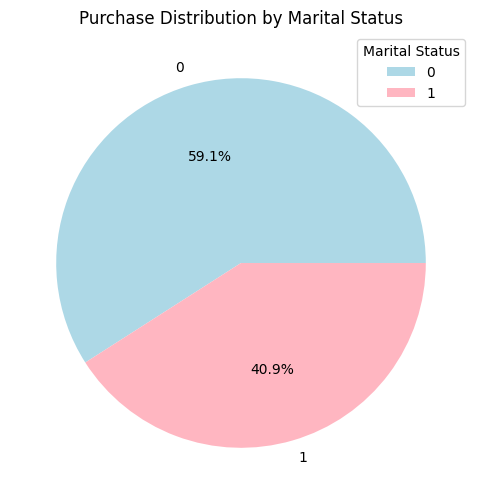

In [67]:
marital_sales = data.groupby("Marital_Status")["Purchase"].count().reset_index()
plt.figure(figsize=(7,6))
plt.pie(marital_sales["Purchase"], labels=marital_sales["Marital_Status"], autopct='%1.1f%%', colors=["lightblue", "lightpink"])
plt.title("Purchase Distribution by Marital Status")
plt.legend(title="Marital Status")
plt.show()

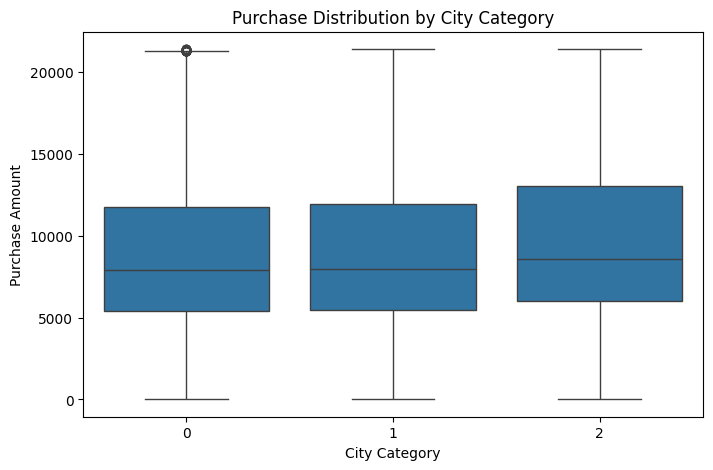

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="City_Category", y="Purchase", data=data)
plt.xlabel("City Category")
plt.ylabel("Purchase Amount")
plt.title("Purchase Distribution by City Category")
plt.show()

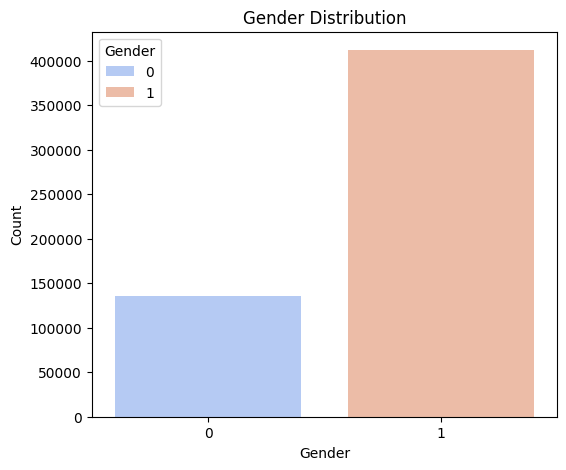

In [69]:
plt.figure(figsize=(6, 5))
sns.countplot(x="Gender", data=data, palette="coolwarm",hue="Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()


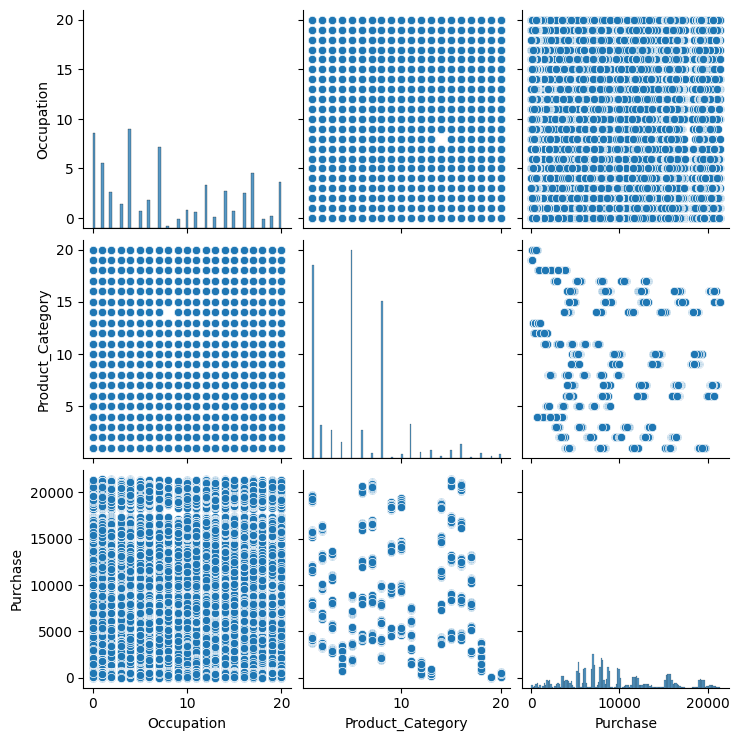

In [70]:
sns.pairplot(data[["Occupation", "Product_Category", "Purchase"]])
plt.show()

In [71]:
x = data.drop(columns=["Purchase"])
y = data["Purchase"]

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [73]:
model = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=8, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}
trained_models = {}
for name,model in model.items():
  model.fit(x_train,y_train)
  trained_models[name] = model

  y_predict = model.predict(x_test)

  R2_score = r2_score(y_test,y_predict)
  mae = mean_absolute_error(y_test,y_predict)
  mse = mean_squared_error(y_test,y_predict)

  print(f"Training {name} model")
  print(f"R2 score : {R2_score:.4f}")
  print(f"mae : {mae:.4f}")
  print(f"mse : {mse :.4f}")







Training Random Forest model
R2 score : 0.6411
mae : 2236.9783
mse : 8811422.6835
Training Decision Tree model
R2 score : 0.6343
mae : 2258.9066
mse : 8978808.3525
Training XGBoost model
R2 score : 0.6412
mae : 2233.8906
mse : 8809083.0000


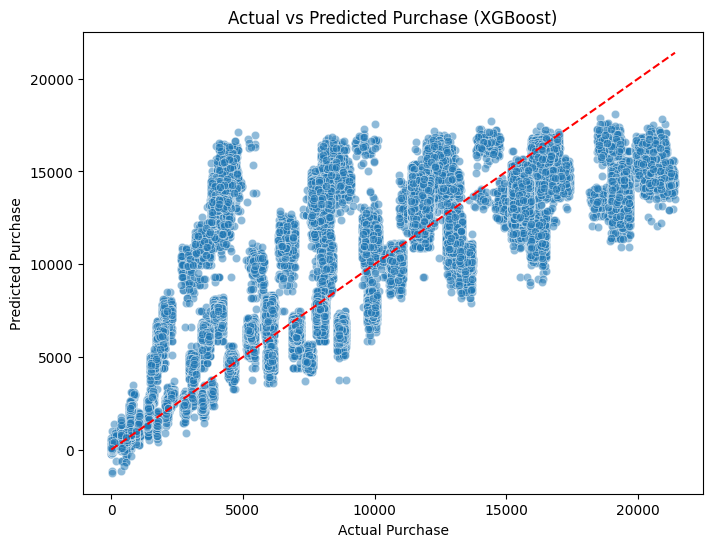

In [74]:
y_pred = trained_models["XGBoost"].predict(x_test)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Purchase")
plt.ylabel("Predicted Purchase")
plt.title("Actual vs Predicted Purchase (XGBoost)")
plt.show()

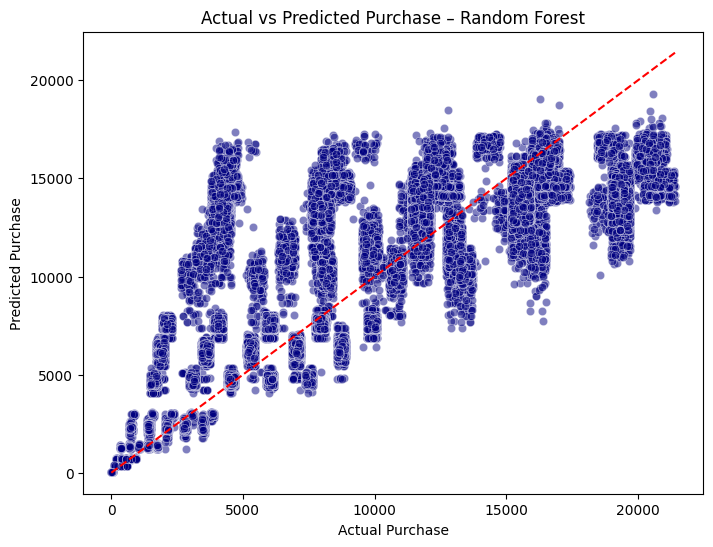

In [75]:
y_pred_rf = trained_models["Random Forest"].predict(x_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Purchase")
plt.ylabel("Predicted Purchase")
plt.title("Actual vs Predicted Purchase – Random Forest")
plt.show()

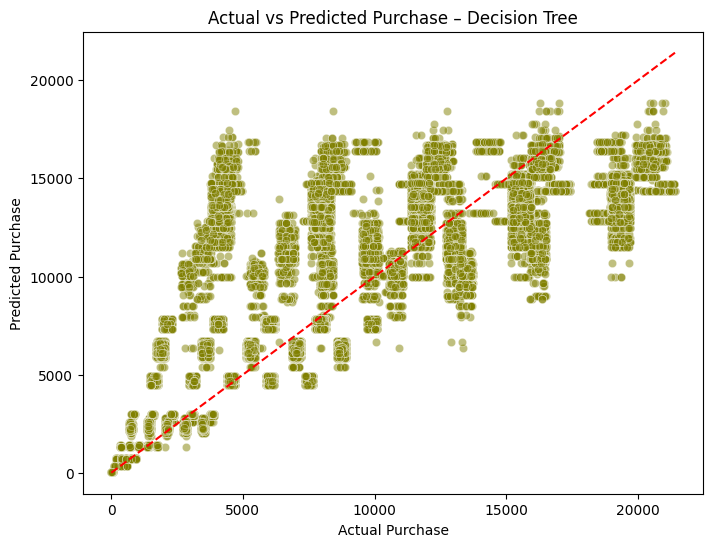

In [76]:
y_pred_dt = trained_models["Decision Tree"].predict(x_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.5, color='olive')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Purchase")
plt.ylabel("Predicted Purchase")
plt.title("Actual vs Predicted Purchase – Decision Tree")
plt.show()